In [42]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"C:\Users\k.navadeepreddy\Downloads\BMW_Data.csv")
data

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000
...,...,...,...,...,...,...,...
7207,2024-12-19,77.279999,77.279999,78.379997,76.900002,77.080002,1297262
7208,2024-12-20,77.580002,77.580002,77.860001,76.120003,76.699997,2000177
7209,2024-12-23,76.940002,76.940002,77.680000,76.260002,77.620003,642208
7210,2024-12-27,78.339996,78.339996,78.459999,76.739998,76.879997,958948


In [44]:
data['Date'] = pd.to_datetime(data['Date'])

In [45]:
data=data[['Close']]

In [46]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler(feature_range=(0,1))
scaled_data=mmc.fit_transform(data)

In [9]:
time_steps=60

In [47]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
generator=TimeseriesGenerator(scaled_data,scaled_data,length=time_steps,batch_size=32)

In [48]:
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

In [49]:
train_sequence_generator=TimeseriesGenerator(train_data,train_data,length=time_steps,batch_size=32)
test_sequence_generator=TimeseriesGenerator(test_data,test_data,length=time_steps,batch_size=32)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(time_steps,1)))
model.add(Dense(1))

C:\Users\k.navadeepreddy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_sequence_generator,epochs=46,validation_data=test_sequence_generator)

Epoch 1/46


C:\Users\k.navadeepreddy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0534 - val_loss: 0.0021
Epoch 2/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - val_loss: 8.9429e-04
Epoch 3/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1890e-04 - val_loss: 8.4014e-04
Epoch 4/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8202e-04 - val_loss: 9.5460e-04
Epoch 5/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9269e-04 - val_loss: 7.7271e-04
Epoch 6/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.0794e-04 - val_loss: 7.5745e-04
Epoch 7/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.7980e-04 - val_loss: 6.8444e-04
Epoch 8/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7207e-04 - val_loss: 7.8046e-04
Epoch 9/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.6426e-04 - val_loss: 8.5205e-04
Epoch 10/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.4817e-04 - val_loss: 6.3604e-04
Epoch 11/46
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.8338e-04 - val_los

In [52]:
predictions=model.predict(test_sequence_generator)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [53]:
predictions=mmc.inverse_transform(predictions)
actual_values=mmc.inverse_transform(test_data[time_steps:])

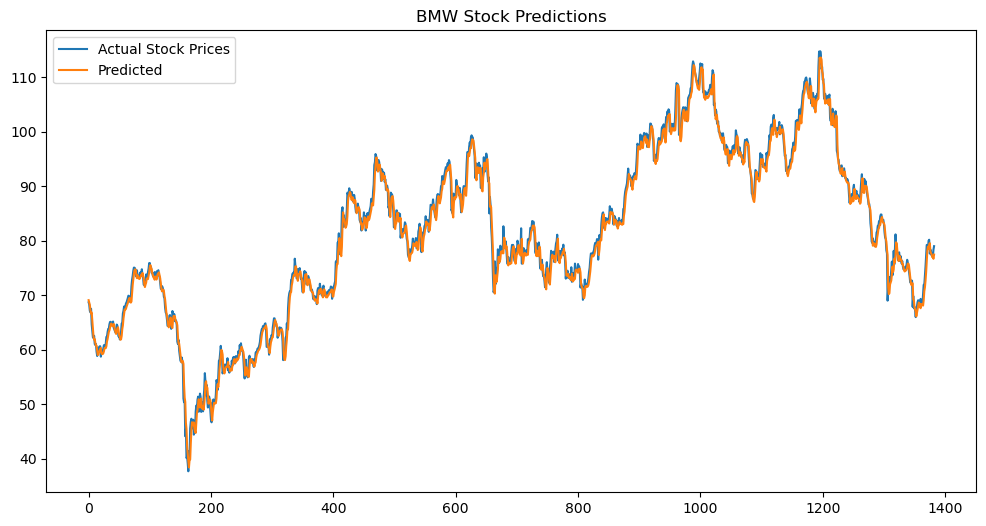

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(actual_values,label="Actual Stock Prices")
plt.plot(predictions,label="Predicted")
plt.title("BMW Stock Predictions")
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
accuracy=r2_score(predictions,actual_values)
mse=mean_squared_error(predictions,actual_values)
rmse=np.sqrt(mean_squared_error(predictions,actual_values))

In [56]:
print('Accuracy : ',accuracy)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)

Accuracy :  0.9890495250236783
Mean Squared Error :  2.578172261470327
Root Mean Squared Error :  1.6056687894675934
